# Analysis of Weather Conditions in Toronto and Their Impact on the Incidence of Crime From 2016-2021

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Load the Weather CSV file created previously into a Pandas DataFrame
weather_data_df = pd.read_csv("Output/weather.csv")
weather_data_df

,Date,Mean Temperature (C),Maximum Temperature (C),Total Precipitation (mm),Total Rain (mm),Total Snow (cm),Snow On Ground (cm),Maximum Wind Gust (km/h)
0,2016-01-01,-2.3,-0.3,0.8,0.0,0.8,0.0,46.0
1,2016-01-02,-2.0,0.3,0.0,0.0,0.0,0.0,44.0
2,2016-01-03,-5.0,1.6,0.0,0.0,0.0,0.0,54.0
3,2016-01-04,-13.3,-11.2,0.0,0.0,0.0,0.0,37.0
4,2016-01-05,-8.9,-2.6,0.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...
2187,2021-12-27,-3.1,0.1,3.6,0.0,4.6,4.0,48.0
2188,2021-12-28,0.9,2.3,0.2,0.0,0.2,2.0,57.0
2189,2021-12-29,1.0,2.2,0.2,0.2,0.0,1.0,0.0
2190,2021-12-30,1.1,2.2,0.0,0.0,0.0,0.0,0.0


In [3]:
# Import cleaned main crime data csv file and convert into Pandas DataFrame
main_data_df = pd.read_csv("Resources/MCI_main_cleaned_data.csv")
main_data_df.head()

,Unnamed: 0,Event Unique ID,Report Date,Occurence Date,Occurence Year,Occurence Month,Occurence Day,Occurence Day of Year,Occurence Day of Week,Premises Type,MCI Category,Hood ID,Neighbourhood,Longitude,Latitude
0,0,GO-20163930,2016-01-01,2016-01-01,2016,January,1,1,Friday,House,Assault,133,Centennial Scarborough,-79.144112,43.776319
1,1,GO-20164197,2016-01-01,2016-01-01,2016,January,1,1,Friday,Outside,Assault,159,Etobicoke City Centre,-79.546283,43.616413
2,2,GO-20162690,2016-01-01,2016-01-01,2016,January,1,1,Friday,House,Auto Theft,25,Glenfield-Jane Heights,-79.522923,43.751382
3,3,GO-2016418,2016-01-01,2016-01-01,2016,January,1,1,Friday,Outside,Assault,70,South Riverdale,-79.354948,43.641216
4,4,GO-2016452,2016-01-01,2016-01-01,2016,January,1,1,Friday,Apartment,Assault,108,Briar Hill-Belgravia,-79.451926,43.701471


In [4]:
# Merge Weather and Main DataFrame
merged_weather_df = pd.merge(main_data_df, weather_data_df, left_on="Occurence Date", right_on="Date", how="outer")

# Export merged DataFrame into a csv
merged_weather_df.to_csv("Output/merged_weather.csv", index=False)

In [5]:
# Count crime occurrences and group by each day from 2016-2021 to obtain a daily number of crime occurrences
daily_crime_rate = merged_weather_df.groupby("Occurence Date")["Event Unique ID"].count()
daily_crime_rate.to_frame()

,Event Unique ID
Occurence Date,
2016-01-01,161
2016-01-02,66
2016-01-03,64
2016-01-04,53
2016-01-05,72
...,...
2021-12-27,65
2021-12-28,71
2021-12-29,71


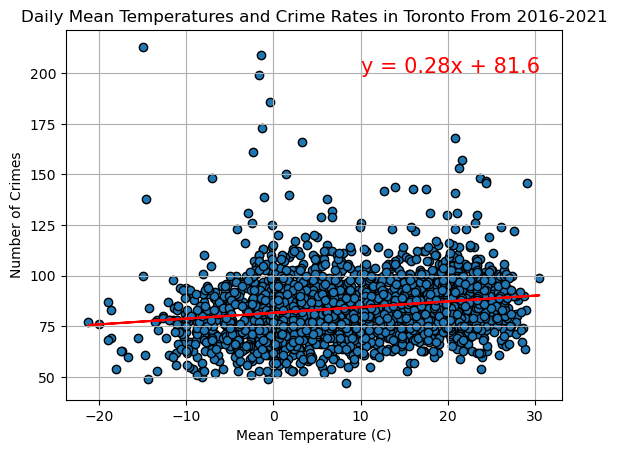

In [6]:
# Plot scatter plot of daily crime occurrences and mean daily temperature over entire five year period (2016-2021)
x_values = weather_data_df['Mean Temperature (C)']
y_values = daily_crime_rate
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto From 2016-2021")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,200),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_all_years.png")
plt.show()

**Discussion**: Over the selected time period from 2016-2021, a positive relationship between the daily mean temperatures and number of crimes committed is observed. As the mean temperature per day increases, the number of crimes committed per day also increases. This makes sense logically, as warmer weather tends to provide more opportunities for public interaction with increased foot traffic (e.g. social events, festivals, outings, etc.), which may increase the likelihood of fights breaking out and personal crime incidents such as assault being committed, while also facilitating the ease with which property crime incidents such as robbery can be committed. Moreover, introducing factors such as increased alcohol consumption in the summer months and the "heat hypothesis", which asserts that people become more easily agitated and irritable in warmer weather, further amplifies this relationship. Incidences of property crime such as auto theft and break and enters may also be more likely to occur in warmer weather due to the belief that families tend to go on vacation in the warmer summer months while children are out of school, leaving homes empty and more easily accessible.

C:\Users\aliha\AppData\Local\Temp\ipykernel_45580\2439648712.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  just_2016_weather = weather_data_df[weather_data_df["Date"].between("2016-01-01","2016-12-31", inclusive=True)]


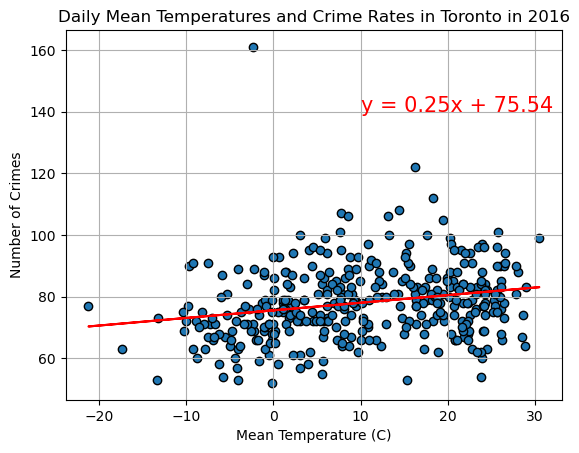

In [7]:
# Plot scatter plot of daily crime occurrences and mean daily temperature for 2016

# Filter Weather DataFrame for just 2016 values
just_2016_weather = weather_data_df[weather_data_df["Date"].between("2016-01-01","2016-12-31", inclusive=True)]
# Filter Main DataFrame for just 2016 values
just_2016_main = main_data_df.loc[(main_data_df["Occurence Year"] == 2016), :]

# Count crime occurrences and group by each day in 2016 to obtain a daily number of crime occurrences
crime_rate_2016 = just_2016_main.groupby("Occurence Date")["Event Unique ID"].count()
crime_rate_2016.to_frame()

# Plot scatterplot for 2016
x_values = just_2016_weather['Mean Temperature (C)']
y_values = crime_rate_2016
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto in 2016")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,140),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_2016.png")
plt.show()

**Discussion**: Performing a linear regression on the daily number mean temperatures and number of crimes committed over a smaller time period (2016) highlights and reaffirms the positive relationship between the two variables observed over 2016-2021 in aggregate. As per our 2016 crime and weather data, as the mean temperature per day increased, the number of crimes committed per day also increased.

C:\Users\aliha\AppData\Local\Temp\ipykernel_45580\2092086758.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  just_2017_weather = weather_data_df[weather_data_df["Date"].between("2017-01-01","2017-12-31", inclusive=True)]


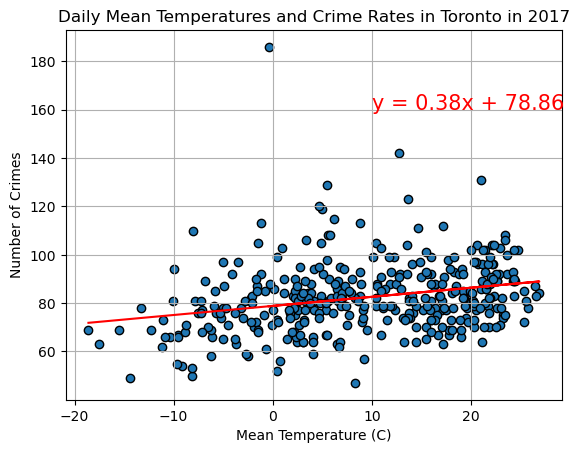

In [8]:
# Plot scatter plot of daily crime occurrences and mean daily temperature for 2017

# Filter Weather DataFrame for just 2017 values
just_2017_weather = weather_data_df[weather_data_df["Date"].between("2017-01-01","2017-12-31", inclusive=True)]
# Filter Main DataFrame for just 2017 values
just_2017_main = main_data_df.loc[(main_data_df["Occurence Year"] == 2017), :]

# Count crime occurrences and group by each day in 2017 to obtain a daily number of crime occurrences
crime_rate_2017 = just_2017_main.groupby("Occurence Date")["Event Unique ID"].count()
crime_rate_2017.to_frame()

# Plot scatterplot for 2017
x_values = just_2017_weather['Mean Temperature (C)']
y_values = crime_rate_2017
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto in 2017")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,160),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_2017.png")
plt.show()

**Discussion**: Performing a linear regression on the daily mean temperatures and number of crimes committed over a smaller time period (2017) highlights and reaffirms the positive relationship between the two variables observed over 2016-2021 in aggregate. As per our 2017 crime and weather data, as the mean temperature per day increased, the number of crimes committed per day also increased.

C:\Users\aliha\AppData\Local\Temp\ipykernel_45580\264060747.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  just_2018_weather = weather_data_df[weather_data_df["Date"].between("2018-01-01","2018-12-31", inclusive=True)]


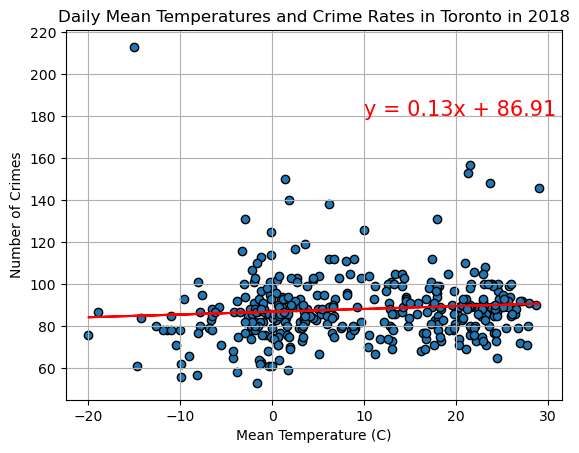

In [9]:
# Plot scatter plot of daily crime occurrences and mean daily temperature for 2018

# Filter Weather DataFrame for just 2018 values
just_2018_weather = weather_data_df[weather_data_df["Date"].between("2018-01-01","2018-12-31", inclusive=True)]
# Filter Main DataFrame for just 2018 values
just_2018_main = main_data_df.loc[(main_data_df["Occurence Year"] == 2018), :]

# Count crime occurrences and group by each day in 2018 to obtain a daily number of crime occurrences
crime_rate_2018 = just_2018_main.groupby("Occurence Date")["Event Unique ID"].count()
crime_rate_2018.to_frame()

# Plot scatterplot for 2018
x_values = just_2018_weather['Mean Temperature (C)']
y_values = crime_rate_2018
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto in 2018")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,180),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_2018.png")
plt.show()

**Discussion**: Performing a linear regression on the daily mean temperatures and number of crimes committed over a smaller time period (2018) highlights and reaffirms the positive relationship between the two variables observed over 2016-2021 in aggregate. As per our 2018 crime and weather data, as the mean temperature per day increased, the number of crimes committed per day also increased.

C:\Users\aliha\AppData\Local\Temp\ipykernel_45580\2712162255.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  just_2019_weather = weather_data_df[weather_data_df["Date"].between("2019-01-01","2019-12-31", inclusive=True)]


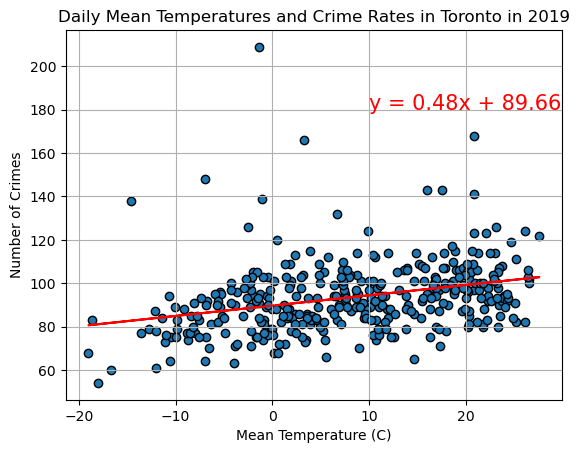

In [10]:
# Plot scatter plot of daily crime occurrences and mean daily temperature for 2019

# Filter Weather DataFrame for just 2019 values
just_2019_weather = weather_data_df[weather_data_df["Date"].between("2019-01-01","2019-12-31", inclusive=True)]
# Filter Main DataFrame for just 2019 values
just_2019_main = main_data_df.loc[(main_data_df["Occurence Year"] == 2019), :]

# Count crime occurrences and group by each day in 2019 to obtain a daily number of crime occurrences
crime_rate_2019 = just_2019_main.groupby("Occurence Date")["Event Unique ID"].count()
crime_rate_2019.to_frame()

# Plot scatterplot for 2019
x_values = just_2019_weather['Mean Temperature (C)']
y_values = crime_rate_2019
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto in 2019")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,180),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_2019.png")
plt.show()

**Discussion**: Performing a linear regression on the daily mean temperatures and number of crimes committed over a smaller time period (2019) highlights and reaffirms the positive relationship between the two variables observed over 2016-2021 in aggregate. As per our 2019 crime and weather data, as the mean temperature per day increased, the number of crimes committed per day also increased.

C:\Users\aliha\AppData\Local\Temp\ipykernel_45580\2325529173.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  just_2020_weather = weather_data_df[weather_data_df["Date"].between("2020-01-01","2020-12-31", inclusive=True)]


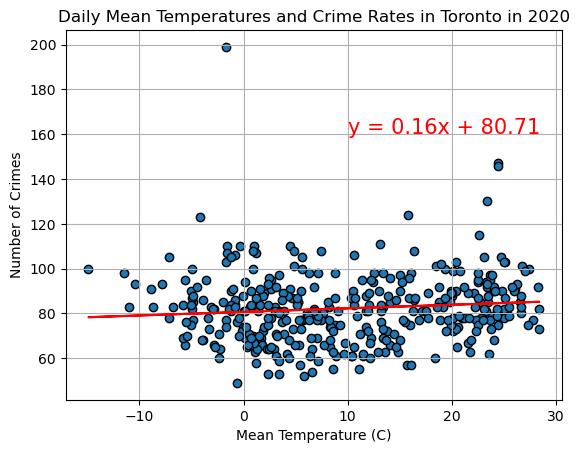

In [11]:
# Plot scatter plot of daily crime occurrences and mean daily temperature for 2020

# Filter Weather DataFrame for just 2020 values
just_2020_weather = weather_data_df[weather_data_df["Date"].between("2020-01-01","2020-12-31", inclusive=True)]
# Filter Main DataFrame for just 2020 values
just_2020_main = main_data_df.loc[(main_data_df["Occurence Year"] == 2020), :]

# Count crime occurrences and group by each day in 2020 to obtain a daily number of crime occurrences
crime_rate_2020 = just_2020_main.groupby("Occurence Date")["Event Unique ID"].count()
crime_rate_2020.to_frame()

# Plot scatterplot for 2020
x_values = just_2020_weather['Mean Temperature (C)']
y_values = crime_rate_2020
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto in 2020")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,160),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_2020.png")
plt.show()

**Discussion**: Performing a linear regression on the daily number of crime and mean temperatures over a smaller time period (2020) highlights and reaffirms the positive relationship between the two variables observed over 2016-2021 in aggregate. As per our 2020 crime and weather data, as the mean temperature per day increased, the number of crimes committed per day also increased. It should be noted however, that the slope of regression line calculated for 2020 is significantly lower and the regression line appears flatter than that of previous years, indicating a weaker relationship between daily mean temperatures and number of crimes for the 2020 year. This makes sense logically considering the onset of the COVID-19 pandemic in this year, which resulted in mass lockdowns, restrictions and a sudden pause in social activity and public interaction throughout the year and well into 2021. This meant that even during days of warmer weather, a significantly smaller number of people were leaving their homes or mingling in public spaces, creating limited opportunities for both personal and property crimes. As such, an increase in the daily mean temperature does not cause as large of an increase in the number of crimes committed per day as per the linear regression performed for the 2020 year.

C:\Users\aliha\AppData\Local\Temp\ipykernel_45580\661805306.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  just_2021_weather = weather_data_df[weather_data_df["Date"].between("2021-01-01","2021-12-31", inclusive=True)]


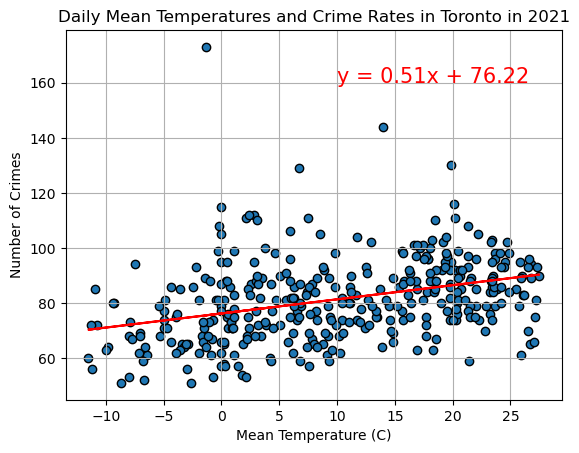

In [12]:
# Plot scatter plot of daily crime occurrences and mean daily temperature for 2021

# Filter Weather DataFrame for just 2021 values
just_2021_weather = weather_data_df[weather_data_df["Date"].between("2021-01-01","2021-12-31", inclusive=True)]
# Filter Main DataFrame for just 2021 values
just_2021_main = main_data_df.loc[(main_data_df["Occurence Year"] == 2021), :]

# Count crime occurrences and group by each day in 2021 to obtain a daily number of crime occurrences
crime_rate_2021 = just_2021_main.groupby("Occurence Date")["Event Unique ID"].count()
crime_rate_2021.to_frame()

# Plot scatterplot for 2021
x_values = just_2021_weather['Mean Temperature (C)']
y_values = crime_rate_2021
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.grid(True)

# Perform linear regression on x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.title("Daily Mean Temperatures and Crime Rates in Toronto in 2021")
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Number of Crimes')

# Annotate regression equation on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,160),fontsize=15,color="red")

# Show plot and save figure
plt.savefig("Output/crime_and_temp_2021.png")
plt.show()

**Discussion**: Performing a linear regression on the daily number of crime and mean temperatures over a smaller time period (2021) highlights and reaffirms the positive relationship between the two variables observed over 2016-2021 in aggregate. As per our 2021 crime and weather data, as the mean temperature per day increased, the number of crimes committed per day also increased. It should also be noted that the slope of regression line calculated for 2021 is significantly higher than that of 2020, indicating a much stronger relationship between daily mean temperatures and number of crimes committed for this year. This makes sense, as lockdown restrictions had begun to ease over the course of 2021 with significantly more opportunities for public/social interaction (e.g. return to office) than in the previous year, which in turn created more opportunities for criminals to commit both personal and property crimes.

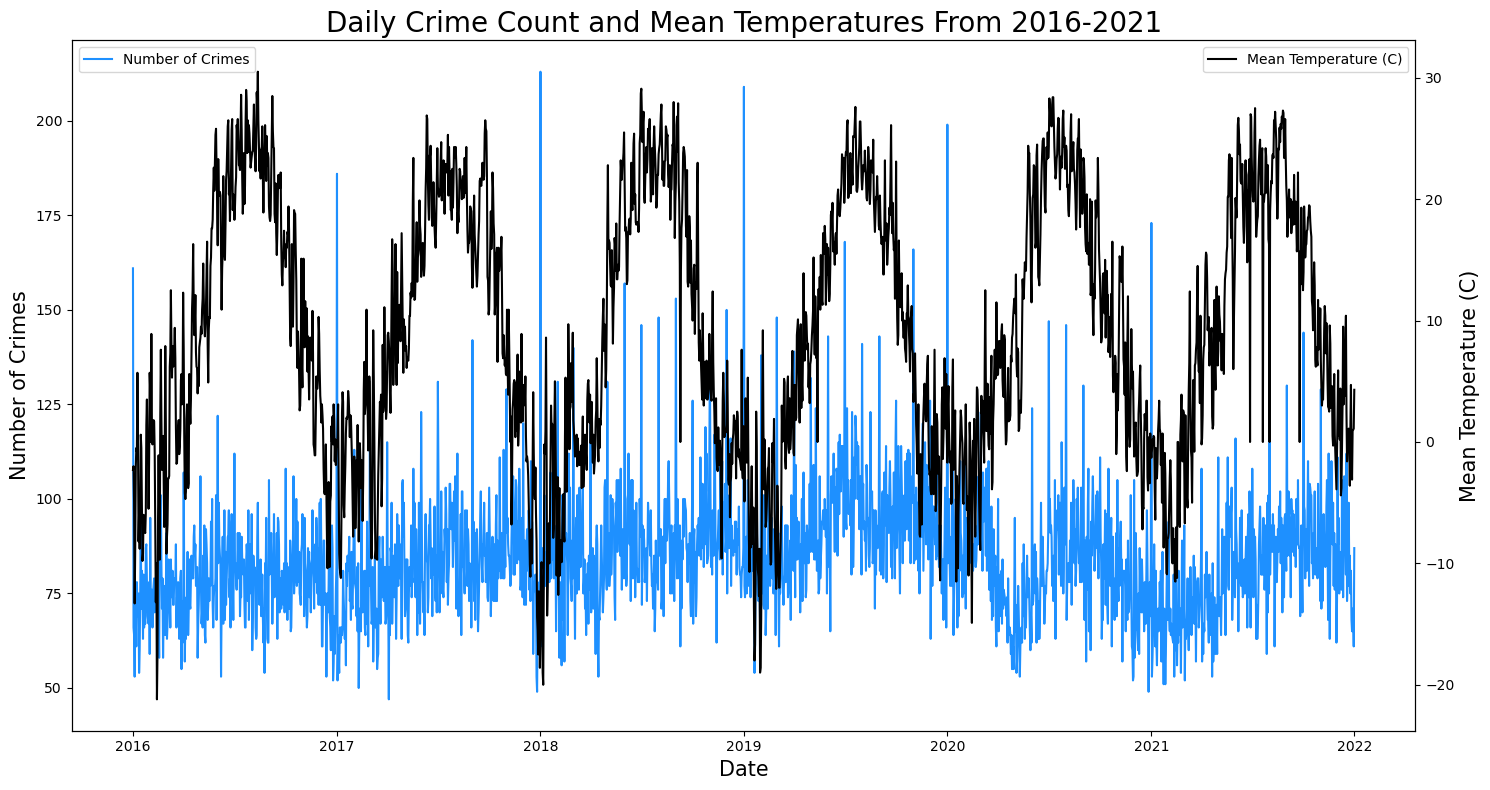

In [13]:
# Plot two line graphs with a secondary y-axis for mean temperature, demonstrating the relationship between the occurence of crime and temperature over time
x = weather_data_df['Date']
y1 = daily_crime_rate
y2 = weather_data_df['Mean Temperature (C)']

fig, ax = plt.subplots(figsize=(15,8))
ax2=ax.twinx()
ax.plot(x, y1, color='dodgerblue', label="Number of Crimes")
ax2.plot(x, y2, color='black', label="Mean Temperature (C)")

# Set legend
ax.legend(loc=2)
ax2.legend(loc=0)

# Set labels
plt.title("Daily Crime Count and Mean Temperatures From 2016-2021", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Number of Crimes", fontsize=15)
ax2.set_ylabel("Mean Temperature (C)", fontsize=15)

# Set x-axis tick locations
plt.xticks(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2021-12-31"], [2016, 2017, 2018, 2019, 2020, 2021, 2022])

# Show plot and save figure
plt.tight_layout()
plt.savefig("Output/crime_and_temp_line.png")
plt.show()

**Discussion**: There is a discernible seasonal pattern between the trendlines for mean temperatures and number of crimes committed from 2016-2021, which appear to closely mirror one another and move in lockstep. In other words, as mean temperatures peak, we can clearly see the trendline for the number of crimes committed form a similar peak and trough subsequently. This indicates that the number of crimes committed rises as the mean temperature rises in the summer months, and similarly drops as the mean temperature drops in the winter months. It should be noted that there are a few data points in this plot that do not follow this pattern; on the first and/or last day of each year, there is a sharp uptick in the number of crimes committed despite the low mean temperatures during this time of year. These dates coincide with New Year's Eve and New Year's Day, which is the likely explanation as to why the number of crimes committed picks up drastically on these particular dates; heavy alcohol consumption paired with large groups of people gathered together is quite the recipe for criminal activity.

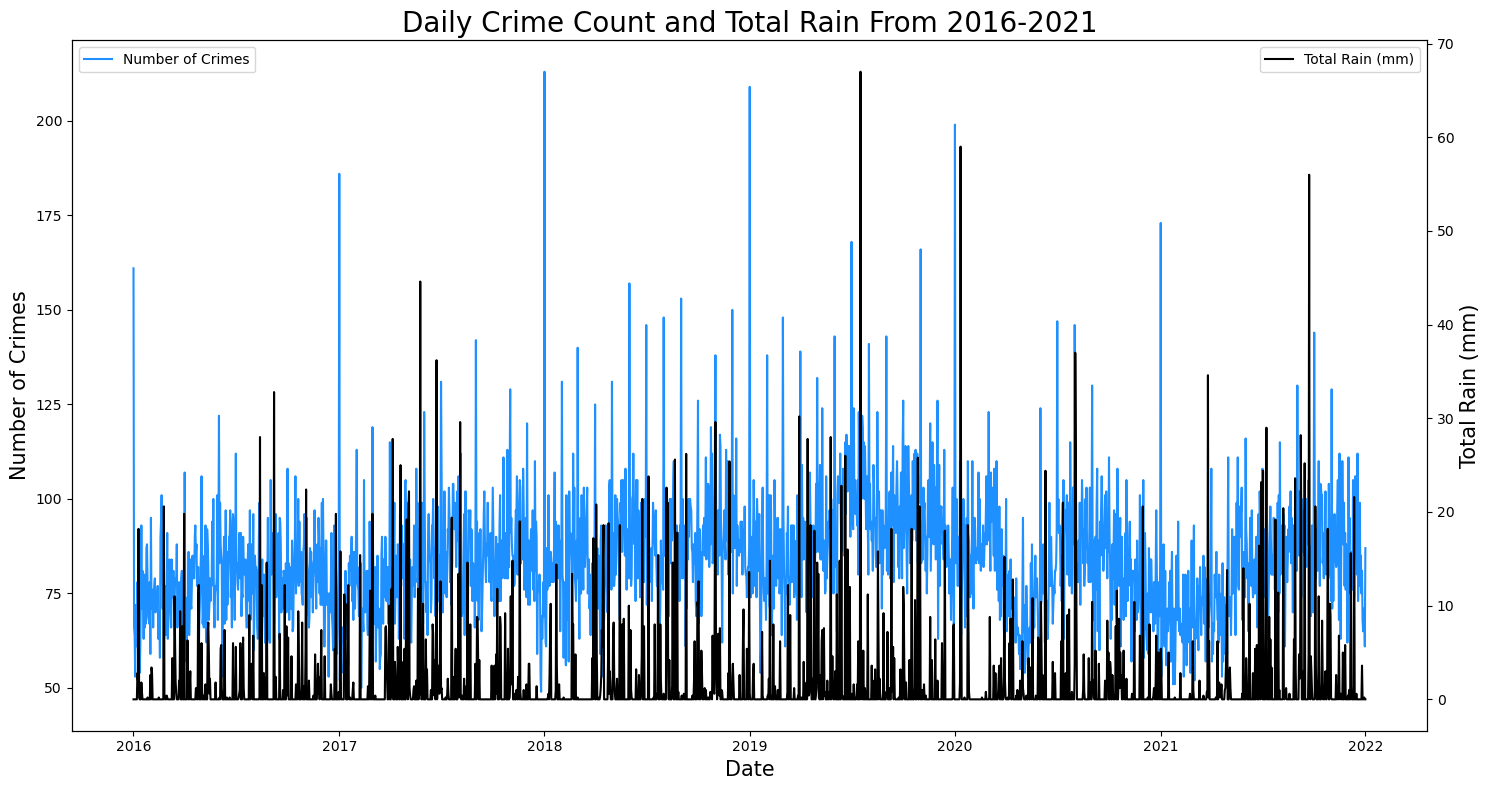

In [14]:
# Plot two line graphs with a secondary y-axis for total rain, demonstrating the relationship between the occurence of crime and rain over time
x = weather_data_df['Date']
y1 = daily_crime_rate
y2 = weather_data_df['Total Rain (mm)']

fig, ax = plt.subplots(figsize=(15,8))
ax2=ax.twinx()
ax.plot(x, y1, color='dodgerblue', label="Number of Crimes")
ax2.plot(x, y2, color='black', label="Total Rain (mm)")

# Set legend
ax.legend(loc=2)
ax2.legend(loc=0)

# Set labels
plt.title("Daily Crime Count and Total Rain From 2016-2021", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Number of Crimes", fontsize=15)
ax2.set_ylabel("Total Rain (mm)", fontsize=15)

# Set x-axis tick locations
plt.xticks(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2021-12-31"], [2016, 2017, 2018, 2019, 2020, 2021, 2022])

# Show plot and save figure
plt.tight_layout()
plt.savefig("Output/crime_and_rain_line.png")
plt.show()

**Discussion**: There is a discernible seasonal pattern between the trendlines for total rain and number of crimes committed from 2016-2021, which appear to move closely together. In other words, the number of crimes committed per day seems to follow and track the total amount of daily rainfall, rising and falling with one another. While rain can be thought of as a deterrent to criminal activity (even criminals like to enjoy their rainy days at home and not bother with muggy weather), it makes more sense to think of rain as an "indicator" of warmer weather; recorded amounts for total rainfall/precipitation are generally higher in the summer and spring months as compared to other seasons. This helps explain why the two variables appear fairly correlated and crime rates appear to rise and fall with the total amount of rainfall.

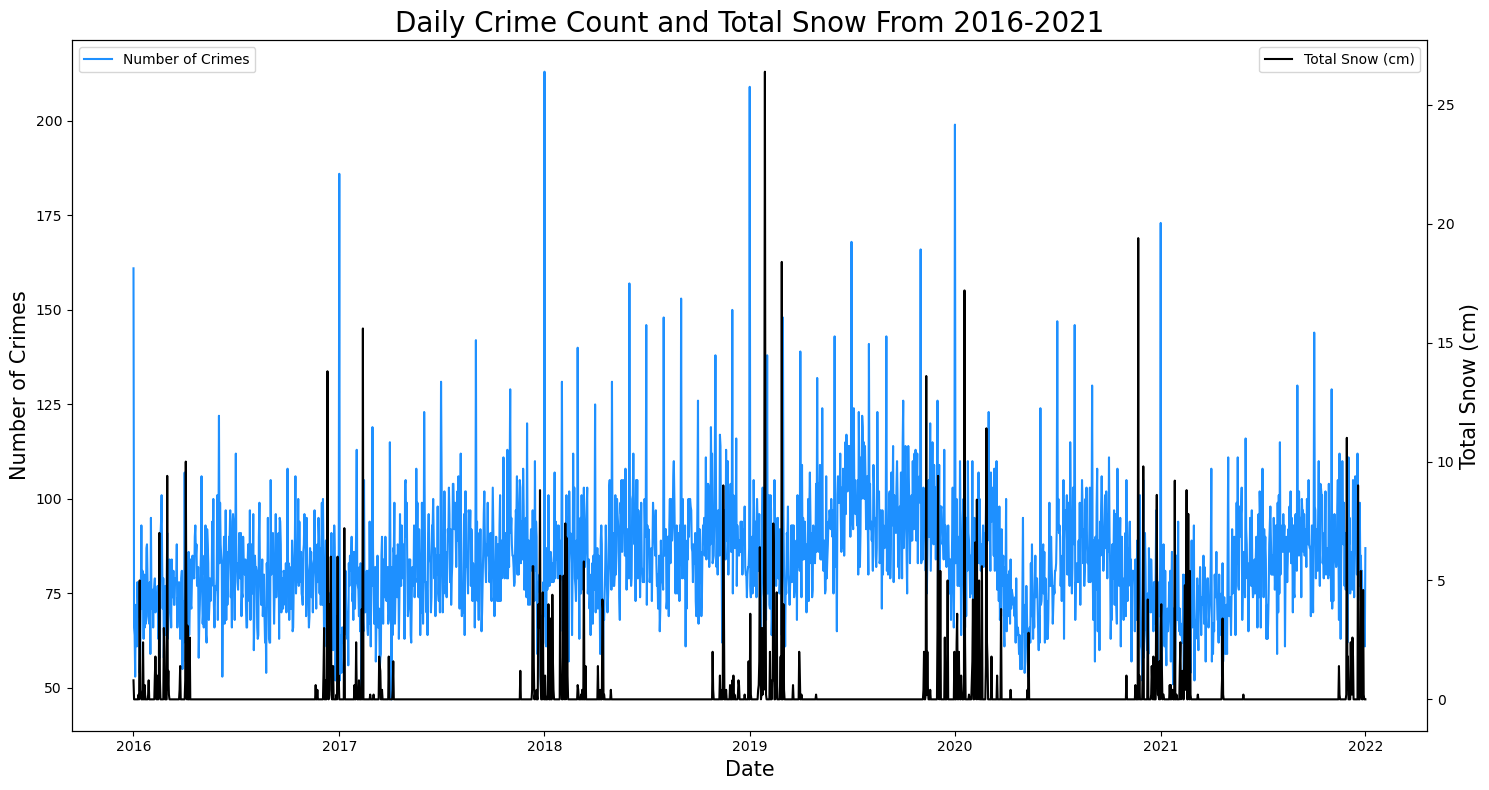

In [15]:
# Plot two line graphs with a secondary y-axis for total snow, demonstrating the relationship between the occurence of crime and snow over time
x = weather_data_df['Date']
y1 = daily_crime_rate
y2 = weather_data_df['Total Snow (cm)']

fig, ax = plt.subplots(figsize=(15,8))
ax2=ax.twinx()
ax.plot(x, y1, color='dodgerblue', label="Number of Crimes")
ax2.plot(x, y2, color='black', label="Total Snow (cm)")

# Set legend
ax.legend(loc=2)
ax2.legend(loc=0)

# Set labels
plt.title("Daily Crime Count and Total Snow From 2016-2021", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Number of Crimes", fontsize=15)
ax2.set_ylabel("Total Snow (cm)", fontsize=15)

# Set x-axis tick locations
plt.xticks(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2021-12-31"], [2016, 2017, 2018, 2019, 2020, 2021, 2022])

# Show plot and save figure
plt.tight_layout()
plt.savefig("Output/crime_and_snow_line.png")
plt.show()

**Discussion**: There is a discernible seasonal pattern between the trendlines for total snow and number of crimes committed from 2016-2021, which appear to move in the opposite direction relative to one another. In other words, the points on the graph at which total snowfall peaks coincides directly with the points on the graph at which the number of crimes committed is lowest. As total snowfall rises and peaks, the number of crimes committed appears to drop and hit its lowest seasonal point, reaffirming our observed relationship between the incidence of crime and temperature.

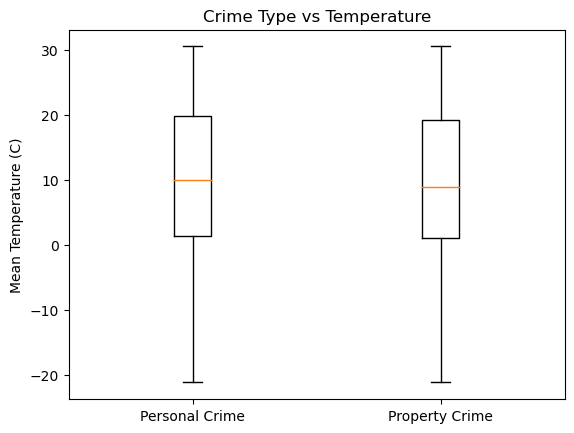

In [16]:
# Create a box plot of personal and property crimes against mean temperatures over 2016-2021

personal_crime = merged_weather_df.loc[merged_weather_df["MCI Category"] == "Assault", :]
property_crime = merged_weather_df.loc[merged_weather_df["MCI Category"] != "Assault", :]

crime_dict = {"Personal Crime": personal_crime["Mean Temperature (C)"],
             "Property Crime": property_crime["Mean Temperature (C)"]}

plt.boxplot(crime_dict.values(), labels=crime_dict.keys())

# Plot labels
plt.ylabel("Mean Temperature (C)")
plt.title("Crime Type vs Temperature")

# Show plot and save figure
plt.savefig("Output/crime_type_vs_temp_boxplot.png")
plt.show()

**Discussion**: This boxplot was created to analyze whether the spread, skewness, and general observations we have made thus far regarding mean temperatures may vary with the type of crime committed. So far, we have been analyzing crime in aggregate with all types of crime grouped together. This boxplot separates crime into two buckets, personal crime (assault) and property crime (auto theft, robbery, break and enter, theft), to determine whether the type of crime committed varies with the mean temperature. We hypothesized that certain types of crime are potentially "easier" to commit or more likely to occur over a wider range of temperatures compared to others and sought to determine whether this is the case. However, it appears that the distribution of data for both types of crime is strikingly similar. The only observable difference between both boxplots is that the median value for mean temperature value is slightly lower for property crime as compared to personal crime.